# Anime recommendation system

This is the final project of my Data Science Bootcamp. This notebook shows the work I did. 
I first show exploratory analysis 
My final function is my final recommendation engine which consists of collaborative filtering and item based filtering

### 1. Importation of data and packages 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer  


df_synopsis=pd.read_csv('anime_with_synopsis.csv')
fullanime=pd.read_csv('anime.csv')
animlist=pd.read_csv('animelist.csv')
df_rating=pd.read_csv('rating_complete.csv')

### 2. Data cleaning and Data exploration

Exploration and visualisation of Fullanime data set

In [2]:
fullanime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [3]:
fullanime.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

In [4]:
fullanime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [5]:
fullanime.Rating.unique()
#First could do a recommendation system based on type, genres, Rating


array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

([<matplotlib.patches.Wedge at 0x26f66c8e2f0>,
 [Text(1.0765236680141477, 0.2260459957737923, 'R - 17+ (violence & profanity)'),
  Text(0.06588001970524154, 1.0980254200170583, 'PG-13 - Teens 13 or older'),
  Text(-1.0594279934401185, 0.2959937950624043, 'PG - Children'),
  Text(-1.0846494253909147, -0.18312734366871297, 'R+ - Mild Nudity'),
  Text(-0.208685886579069, -1.0800232408345238, 'G - All Ages'),
  Text(0.9722442784740579, -0.514529943710236, 'Rx - Hentai'),
  Text(1.0916795929423104, -0.13503949923378566, 'Unknown')],
 [Text(0.5871947280077169, 0.12329781587661397, '6.6%'),
  Text(0.03593455620285902, 0.5989229563729408, '34.9%'),
  Text(-0.5778698146037009, 0.16145116094312958, '8.3%'),
  Text(-0.5916269593041352, -0.09988764200111615, '5.7%'),
  Text(-0.1138286654067649, -0.5891035859097402, '32.9%'),
  Text(0.5303150609858497, -0.2806526965692196, '7.7%'),
  Text(0.5954615961503511, -0.07365790867297399, '3.9%')])

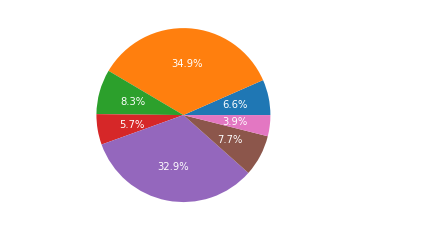

In [6]:
rating=fullanime.Rating.tolist()
def total(x):
    rating=fullanime['Rating'].tolist()
    count=0
    tot=0
    for i in rating: 
        tot=tot+1
        if i==x:
            count=count+1
        
    return (count/tot*100)
data=[total('R - 17+ (violence & profanity)'),total('PG-13 - Teens 13 or older'),total('PG - Children'),total('R+ - Mild Nudity'),total('G - All Ages'),total('Rx - Hentai'),total('Unknown')]
labels=['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown']
plt.rcParams['figure.figsize'] = [10,10]

plt.pie(data,labels=labels,textprops={'color':'white'},autopct='%1.1f%%') 

# fullanime[fullanime['Rating']=='PG - Children'].count()


Further questions for data exploration: 

- How do the ratings vary according to the genres ? 
- How does the rating vary with type
- When there are more episodes does the rating change? 

In [7]:
delfullanime=fullanime[~fullanime.Score.str.contains('Unknown')] 

In [8]:
delfullanime['Score']=delfullanime['Score'].astype(float,errors='raise')
delfullanime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12421 entries, 0 to 17552
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         12421 non-null  int64  
 1   Name           12421 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         12421 non-null  object 
 4   English name   12421 non-null  object 
 5   Japanese name  12421 non-null  object 
 6   Type           12421 non-null  object 
 7   Episodes       12421 non-null  object 
 8   Aired          12421 non-null  object 
 9   Premiered      12421 non-null  object 
 10  Producers      12421 non-null  object 
 11  Licensors      12421 non-null  object 
 12  Studios        12421 non-null  object 
 13  Source         12421 non-null  object 
 14  Duration       12421 non-null  object 
 15  Rating         12421 non-null  object 
 16  Ranked         12421 non-null  object 
 17  Popularity     12421 non-null  int64  
 18  Member

C:\Users\Camila\AppData\Local\Temp\ipykernel_45536\656117039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delfullanime['Score']=delfullanime['Score'].astype(float,errors='raise')


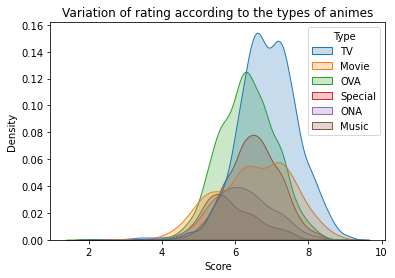

In [9]:
# How do ratings vary according to the type of anime? 

ax= sns.kdeplot(data=delfullanime, x='Score', hue='Type',fill=True)
ax.set_title('Variation of rating according to the types of animes')
fig = ax.get_figure()
fig.savefig("Variation of rating according to the types of animes.png") 

In [10]:
scoretv=delfullanime['Score'][delfullanime.Type=='TV'].mean()
print('For type TV the average score is',scoretv)
scoremovie=delfullanime['Score'][delfullanime.Type=='Movie'].mean()
print('For type Movie the average score is',scoremovie)
scoreOVA=delfullanime['Score'][delfullanime.Type=='OVA'].mean()
print('For type OVA the average score is',scoreOVA)
scoreSpecial=delfullanime['Score'][delfullanime.Type=='Special'].mean()
print('For type Special the average score is',scoreSpecial)
scoreONA=delfullanime['Score'][delfullanime.Type=='ONA'].mean()
print('For type ONA the average score is',scoreONA)
scoremusic=delfullanime['Score'][delfullanime.Type=='Music'].mean()
print('For type music the average score is',scoremusic)

For type TV the average score is 6.894177743028408
For type Movie the average score is 6.497635101636093
For type OVA the average score is 6.321410470156719
For type Special the average score is 6.500507411630559
For type ONA the average score is 6.132749077490775
For type music the average score is 5.882616438356165


In [11]:
scoretv=delfullanime['Score'][delfullanime.Type=='TV'].median()
print('For type TV the median score is',scoretv)
scoremovie=delfullanime['Score'][delfullanime.Type=='Movie'].median()
print('For type Movie the median score is',scoremovie)
scoreOVA=delfullanime['Score'][delfullanime.Type=='OVA'].median()
print('For type OVA the median score is',scoreOVA)
scoreSpecial=delfullanime['Score'][delfullanime.Type=='Special'].median()
print('For type Special the median score is',scoreSpecial)
scoreONA=delfullanime['Score'][delfullanime.Type=='ONA'].median()
print('For type ONA the median score is',scoreONA)
scoremusic=delfullanime['Score'][delfullanime.Type=='Music'].median()
print('For type music the median score is',scoremusic)

For type TV the median score is 6.89
For type Movie the median score is 6.55
For type OVA the median score is 6.32
For type Special the median score is 6.51
For type ONA the median score is 6.12
For type music the median score is 5.75


Below, I separate the different genres 

In [12]:
from sklearn.preprocessing import OneHotEncoder

s= delfullanime['Genres'].str.split(', ').explode() #
encoder=OneHotEncoder()
encoded=encoder.fit_transform(s.values[:,None])
one_hot_anim=pd.DataFrame(encoded.toarray(),columns=np.ravel(encoder.categories_),dtype='int').groupby(s.index).sum()

final=pd.concat([delfullanime,one_hot_anim],axis=1)

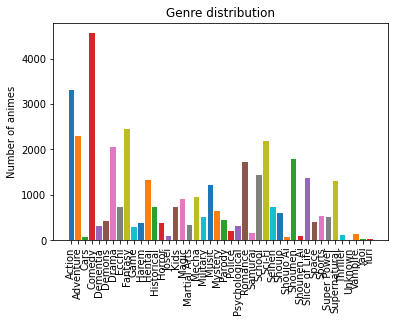

In [13]:
Genrees=one_hot_anim.columns.tolist()

ax=plt.subplot()

for i in Genrees:
    ax.bar(i,final[i].sum(),width=0.8)
    # Sort with count 
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = [16, 10]
ax.set_title('Genre distribution')
ax.set_ylabel('Number of animes')
plt.show()


In [14]:
indix=list(final.index.values)

In [15]:
def Score(Genre): #Define a function that will calculate the average score for each Genre 
    count=0
    score=0
    for index in range(len(indix)):
        if final[Genre].iloc[index]==1:
            count=count+1
            score=score+float(final['Score'].iloc[index])
        else:
            continue
    return(float(score/count))


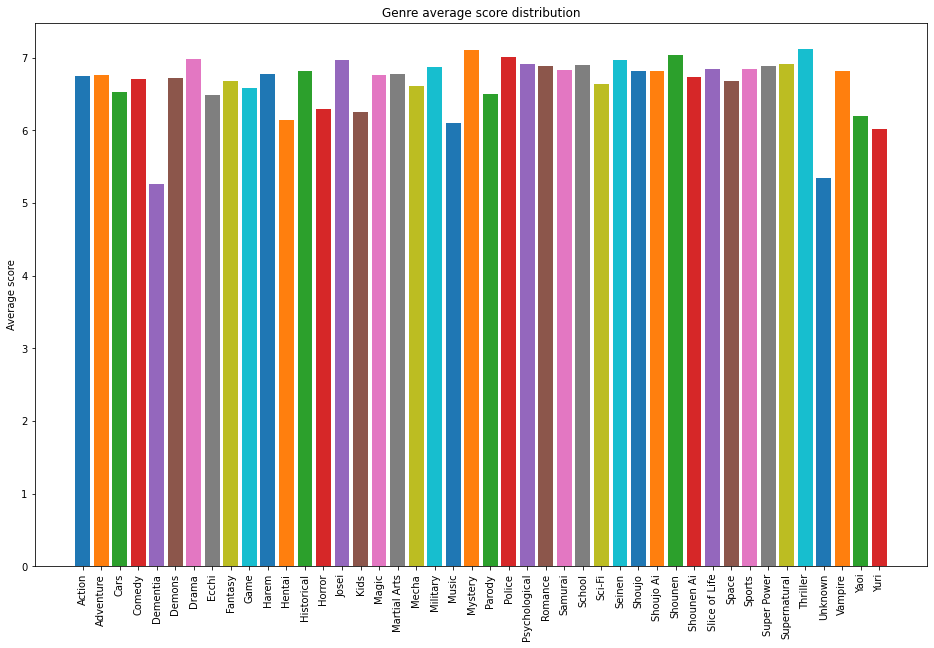

<Figure size 1152x720 with 0 Axes>

In [16]:
ax=plt.subplot()

for i in sorted(Genrees): 
    ax.bar(i,(Score(i)),width=0.8) #Need to do density plot 
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = [16, 10]
ax.set_title('Genre average score distribution')
ax.set_ylabel('Average score')
plt.show()
plt.savefig('Genre average score distribution.png')

In [17]:
dens=[]
genr=[]
for i in Genrees:    
    for index in range(len(indix)):
        if final[i].iloc[index]==1:
            dens.append(float(final['Score'].iloc[index]))
            genr.append(i)
        else:
            continue
    new=pd.DataFrame({'Score':dens,'Genre':genr})


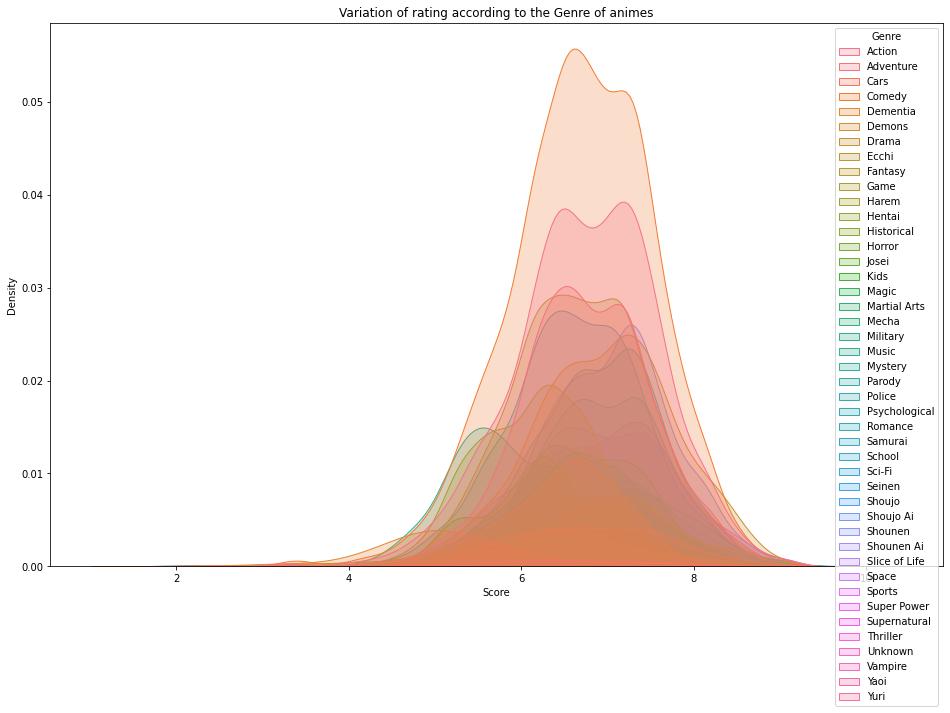

In [18]:
ax= sns.kdeplot(data=new, x='Score', hue='Genre',fill=True)
ax.set_title('Variation of rating according to the Genre of animes') # SOrt 
fig=ax.get_figure()
fig.savefig('Variation of rating according to the Genre of the animes.png')

In [19]:

from collections import Counter

our_genres = Counter()

delfullanime.Genres.apply(lambda x : our_genres.update(Counter(x.split(', '))))

0        None
1        None
2        None
3        None
4        None
         ... 
17504    None
17505    None
17512    None
17513    None
17552    None
Name: Genres, Length: 12421, dtype: object

In [20]:
our_genres

Counter({'Action': 3312,
         'Adventure': 2288,
         'Comedy': 4559,
         'Drama': 2051,
         'Sci-Fi': 2185,
         'Space': 412,
         'Mystery': 643,
         'Shounen': 1796,
         'Police': 211,
         'Supernatural': 1300,
         'Magic': 918,
         'Fantasy': 2452,
         'Sports': 538,
         'Josei': 91,
         'Romance': 1724,
         'Slice of Life': 1370,
         'Cars': 66,
         'Seinen': 725,
         'Horror': 391,
         'Psychological': 318,
         'Thriller': 114,
         'Super Power': 521,
         'Martial Arts': 336,
         'School': 1433,
         'Ecchi': 733,
         'Vampire': 130,
         'Military': 510,
         'Historical': 726,
         'Dementia': 306,
         'Mecha': 946,
         'Demons': 424,
         'Samurai': 164,
         'Game': 300,
         'Shoujo': 612,
         'Harem': 389,
         'Music': 1220,
         'Shoujo Ai': 77,
         'Shounen Ai': 91,
         'Kids': 730,
         'Hen

- Average score for each Genre 

In [21]:
final

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,0,1,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,0,1,0,0,0,0,0,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,0,0,0,0,1,0,0,0,0,0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Unknown,キメツ学園 バレンタイン編,ONA,4,"Feb 14, 2021",Unknown,...,0,0,0,0,0,0,0,0,0,0
17505,47402,Heikousen,7.52,"Music, Romance",Unknown,平行線,Music,1,"Feb 5, 2021",Unknown,...,0,0,0,0,0,0,0,0,0,0
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Unknown,Special,1,"Feb 11, 2021",Unknown,...,1,0,0,0,0,0,0,0,0,0
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,約束のネバーランド 特別編「道標」,Special,1,"Feb 12, 2021",Unknown,...,0,0,0,0,1,1,0,0,0,0


Exploration, data cleaning and visualisation of the synopsis dataset

In [22]:
df_synopsis.isnull().sum()

MAL_ID       0
Name         0
Score        0
Genres       0
sypnopsis    8
dtype: int64

In [23]:
df_synopsis = df_synopsis.fillna('')

df_synopsis['sypnopsis'] = df_synopsis['sypnopsis'].replace(['No synopsis information has been added to this title. Help improve our database by adding a synopsis here .'],'')
df_synopsis.isnull().sum()

MAL_ID       0
Name         0
Score        0
Genres       0
sypnopsis    0
dtype: int64

- Find most common Genres 

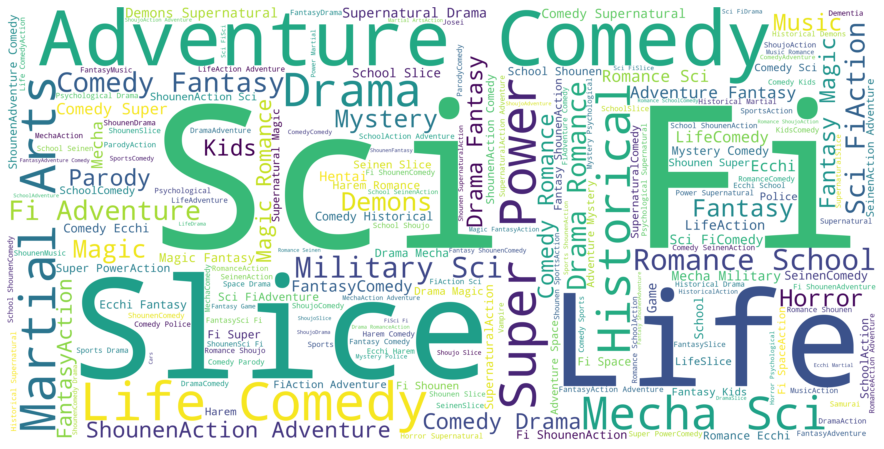

<Figure size 1152x720 with 0 Axes>

In [24]:

genres="".join(genre for genre in delfullanime.Genres)
genres_wordcloud=WordCloud(height=2000, width=4000,background_color='white').generate(genres)
plt.figure(figsize=(16,8))
plt.imshow(genres_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('Most common genres.png')

- Find words that come up often in the synopsis

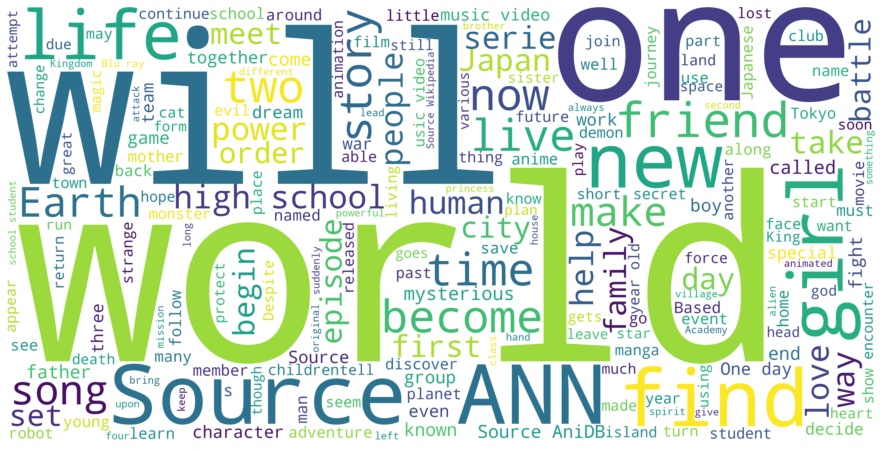

In [25]:
synopsis=''.join(plot for plot in df_synopsis.sypnopsis)
synopsis_wordcloud=WordCloud(stopwords=STOPWORDS, height=2000, width=4000, background_color='white').generate(synopsis)
plt.figure(figsize=(16,8))
plt.imshow(synopsis_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


- Wordcloud for titles 

(-0.5, 3999.5, 1999.5, -0.5)

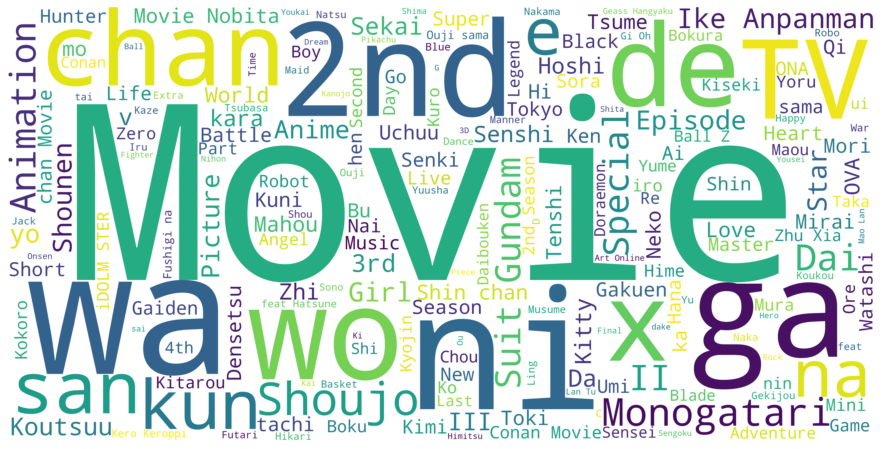

In [26]:
titles=''.join(title for title in df_synopsis.Name)
titles_wordcloud=WordCloud(height=2000, width=4000, background_color='white',stopwords=STOPWORDS).generate(titles)
plt.figure(figsize=(16,8))
plt.imshow(titles_wordcloud,interpolation='bilinear')
plt.axis('off')


Demographic filtering

Demographic filtering: Generalized recommendations to any user, based on anime popularity. This is very generalized and a very simplistic approach. It's based around the idea that animes with highest ranking scores will have a higher probability to be liked by the the general audience. 

- Comparing the score of every movie and seeing which ones have the highest score and the highest popularity

In [27]:
fullanime.Score
delfullanime=fullanime[~fullanime.Score.str.contains('Unknown')] 
fullanimescore=delfullanime.sort_values('Score',ascending=False)

fullanimescore[['Name','Score', 'Type', 'Rating', 'Genres']].head(15)





,Name,Score,Type,Rating,Genres
3971,Fullmetal Alchemist: Brotherhood,9.19,TV,R - 17+ (violence & profanity),"Action, Military, Adventure, Comedy, Drama, Ma..."
15926,Shingeki no Kyojin: The Final Season,9.17,TV,R - 17+ (violence & profanity),"Action, Military, Mystery, Super Power, Drama,..."
5683,Steins;Gate,9.11,TV,PG-13 - Teens 13 or older,"Thriller, Sci-Fi"
14963,Shingeki no Kyojin Season 3 Part 2,9.1,TV,R - 17+ (violence & profanity),"Action, Drama, Fantasy, Military, Mystery, Sho..."
9913,Gintama°,9.1,TV,PG-13 - Teens 13 or older,"Action, Comedy, Historical, Parody, Samurai, S..."
6474,Hunter x Hunter (2011),9.1,TV,PG-13 - Teens 13 or older,"Action, Adventure, Fantasy, Shounen, Super Power"
6006,Gintama',9.08,TV,PG-13 - Teens 13 or older,"Action, Sci-Fi, Comedy, Historical, Parody, Sa..."
741,Ginga Eiyuu Densetsu,9.07,OVA,R - 17+ (violence & profanity),"Military, Sci-Fi, Space, Drama"
7261,Gintama': Enchousen,9.04,TV,PG-13 - Teens 13 or older,"Action, Comedy, Historical, Parody, Samurai, S..."
9886,Koe no Katachi,9.0,Movie,PG-13 - Teens 13 or older,"Drama, School, Shounen"


This could be some sort of recommendation system where one can choose an anime based on the score. Very simple recommendation system

- Looking at anime with highest ranking 

In [28]:
delfullanime2=fullanime[~fullanime.Ranked.str.contains('Unknown')] 
delfullanime2=fullanime[~fullanime.Ranked.str.startswith('0')]
fullanimerank=delfullanime2.sort_values('Ranked',ascending=True)
fullanimerank[['Name','Ranked','Type','Genres','Rating']].head(15)


,Name,Ranked,Type,Genres,Rating
3971,Fullmetal Alchemist: Brotherhood,1.0,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",R - 17+ (violence & profanity)
12898,3-gatsu no Lion 2nd Season,10.0,TV,"Drama, Game, Seinen, Slice of Life",PG-13 - Teens 13 or older
11179,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...,100.0,TV,"Action, Adventure, Comedy, Supernatural, Drama...",R - 17+ (violence & profanity)
3164,JoJo no Kimyou na Bouken: Phantom Blood,1000.0,Movie,"Action, Adventure, Horror, Shounen, Vampire",R - 17+ (violence & profanity)
9749,Arslan Senki (TV),1000.0,TV,"Action, Adventure, Drama, Fantasy, Historical,...",R - 17+ (violence & profanity)
11014,Henkei Sakuhin Dai 1-ban,10001.0,Movie,Dementia,G - All Ages
12938,Hatena☆Illusion,10001.0,TV,"Comedy, Supernatural, Romance, Ecchi",PG-13 - Teens 13 or older
10962,Wake up!! Tamala,10002.0,Movie,"Fantasy, Psychological",G - All Ages
10099,Kage,10003.0,Movie,"Drama, Historical",G - All Ages
2684,Elysium,10004.0,Movie,"Action, Mecha, Sci-Fi",PG-13 - Teens 13 or older


- Looking at animes with the highest popularity

In [29]:

fullanimepop=fullanime.sort_values('Popularity',ascending=True)
fullanimepop=fullanimepop[fullanimepop['Popularity']!=0]

fullanimepop[['Name','Popularity','Type','Genres']].head(15)

,Name,Popularity,Type,Genres
1393,Death Note,1,TV,"Mystery, Police, Psychological, Supernatural, ..."
7449,Shingeki no Kyojin,2,TV,"Action, Military, Mystery, Super Power, Drama,..."
3971,Fullmetal Alchemist: Brotherhood,3,TV,"Action, Military, Adventure, Comedy, Drama, Ma..."
6614,Sword Art Online,4,TV,"Action, Game, Adventure, Romance, Fantasy"
10451,One Punch Man,5,TV,"Action, Sci-Fi, Comedy, Parody, Super Power, S..."
11185,Boku no Hero Academia,6,TV,"Action, Comedy, School, Shounen, Super Power"
8646,Tokyo Ghoul,7,TV,"Action, Mystery, Horror, Psychological, Supern..."
10,Naruto,8,TV,"Action, Adventure, Comedy, Super Power, Martia..."
5683,Steins;Gate,9,TV,"Thriller, Sci-Fi"
8148,No Game No Life,10,TV,"Game, Adventure, Comedy, Supernatural, Ecchi, ..."


- Looking at animes that were had the most 'favorites' ranking

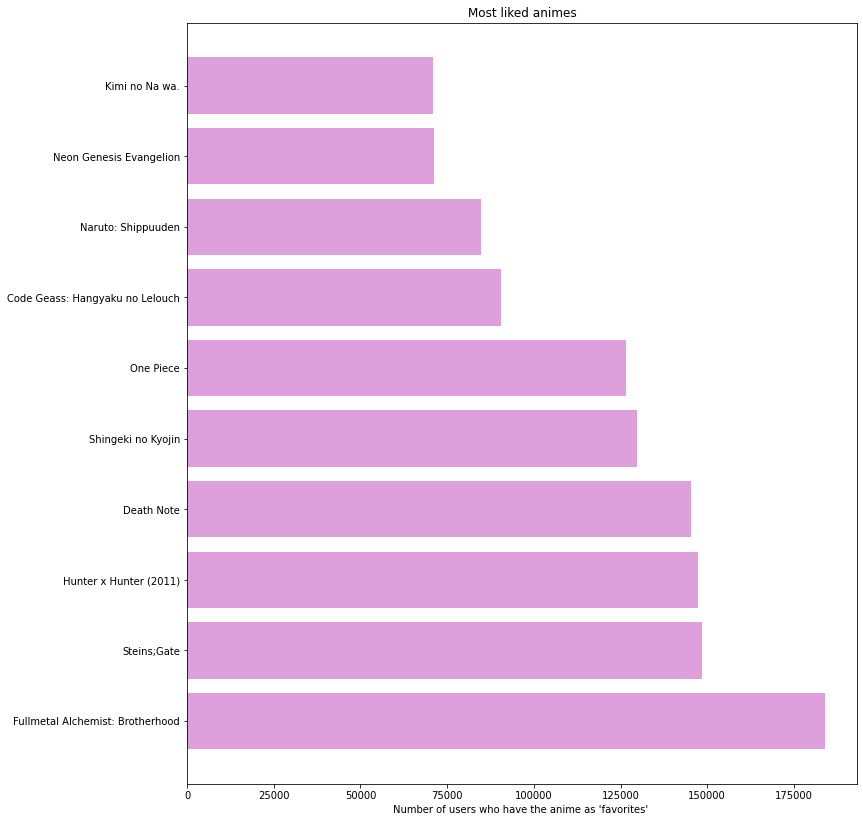

In [30]:
favanime=fullanime.sort_values('Favorites',ascending=False)

plt.figure(figsize=(12,14))

plt.barh(favanime['Name'].head(10),favanime['Favorites'].head(10), align='center', color='plum')

plt.xlabel("Number of users who have the anime as 'favorites' ")
plt.title("Most liked animes")
plt.savefig('Most liked anime.png')


### 3. Content based filtering algorithms 

This recommender system uses item features to recommend other items similar to what the user liked. Here, the content of the anime (synopsis) is used to find similarity with other animes. 

In [31]:
# To do the synopsis based filtering, I need to download the synopsis dataset 
df_synopsis=pd.read_csv('anime_with_synopsis.csv')

Need to compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

This is the relative frequency of a word in a document. It's equal to == term instances/total instances. 

IDF stands for Inverse Document Frequency which is the relative count of documents containing the term and is given as log(number of documents/documents with term). 

Overall importance of each word in synopsis in which they appear = TF * IDF 

This gives a matrix where each column represents a word in the overview vocabulary and each row represents an anime. 

Purpose of TF-IDF: highlight words which are frequent in a document but not across documents 

In [32]:
#Remove all stop words such as "the"
tfidf=TfidfVectorizer(stop_words='english')
df_synopsis['sypnopsis'] = df_synopsis['sypnopsis'].fillna('')

#Construction of matrix by fitting and transforming the data
tfidf_matrix=tfidf.fit_transform(df_synopsis['sypnopsis'])

tfidf_matrix.shape



(16214, 45064)

Now can calculate cosine similarity score to see which animes are most similar 

In [33]:
# Compute the consine similarity matrix 
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [34]:
# Need a mechanism to identify the index of a movie 

#Construction of a reverse map of indices and movie titles 
indices=pd.Series(df_synopsis.index, index=df_synopsis['Name']) 


In [35]:
def recommendations_for(Name, cosine_sim=cosine_sim):
    idx=indices[Name]
    scores=list(enumerate(cosine_sim[idx]))
    scores=sorted(scores, key=lambda x: x[1], reverse=True)
    scores=scores[1:16]
    anime_indices=[i[0] for i in scores]
    # return df_synopsis['Name'].iloc[anime_indices]
    return (type(anime_indices))

Better output: 

In [36]:
def recommendation_for(Name, cosine_sim=cosine_sim):
    synops=[]
    names=[]
    rating=[]
    genr=[]
    idx=indices[Name]
    scores=list(enumerate(cosine_sim[idx]))
    scores=sorted(scores, key=lambda x: x[1], reverse=True)
    scores=scores[1:16]
    similarity=[i[1] for i in scores]
    anime_indices=[i[0] for i in scores]
    for index in anime_indices: 
        synops.append(df_synopsis['sypnopsis'].iloc[index])
        names.append(df_synopsis['Name'].iloc[index])
        rating.append(df_synopsis['Score'].iloc[index])
        genr.append(df_synopsis['Genres'].iloc[index])

    df=pd.DataFrame({'Names':names,'Synopsis':synops,'Similarity':similarity,'Genres':genr,'Score':rating})
    return df.sort_values('Similarity', ascending=False)

In [37]:
recommendation_for('One Piece',cosine_sim)

,Names,Synopsis,Similarity,Genres,Score
0,One Piece: Episode of East Blue - Luffy to 4-n...,"The words that Gold Roger, the King of the Pir...",0.336906,"Action, Adventure, Comedy, Super Power, Drama,...",7.91
1,One Piece Film: Strong World Episode 0,Set over 20 years prior to the main One Piece ...,0.262670,"Action, Adventure, Comedy, Fantasy, Shounen, S...",8.0
2,One Piece: Romance Dawn Story,"The Straw Hat Pirates, searching for the great...",0.251574,"Action, Fantasy, Comedy, Super Power, Shounen",7.39
3,One Piece Film: Z,The Straw Hat Pirates enter the rough seas of ...,0.215357,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",8.18
4,One Piece Film: Strong World,Upon hearing news that islands in East Blue ar...,0.210524,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",8.17
5,One Piece: Oounabara ni Hirake! Dekkai Dekkai ...,"The story opens on Pirate Zap's ship, where tw...",0.209955,"Action, Adventure, Comedy, Fantasy, Shounen, S...",7.29
6,One Piece 3D2Y: Ace no shi wo Koete! Luffy Nak...,fter suffering great personal loss during the ...,0.196672,"Adventure, Comedy, Fantasy, Shounen",7.92
7,Kaizoku Ouji,Kid was brought up on a small island which flo...,0.188214,"Adventure, Shounen",Unknown
8,Uchuu Kaizoku Mito no Daibouken,"o isn't just another space pirate, she's a thr...",0.161342,"Action, Comedy, Sci-Fi",6.41
9,Nareuneun Dwaeji - Haejeok Mateo,2004 Korean CG film about an anthropomorphic p...,0.158629,"Action, Adventure, Sci-Fi, Shounen",Unknown


- Computing content based filtering with Genres 

Here we don't want to undermine words that come up too much as the only words present are words in relation to Genres (Action, thriller etc.)

In [38]:
cv=CountVectorizer()

cv_matrix=cv.fit_transform(df_synopsis['Genres'])

cosine_sim2=cosine_similarity(cv_matrix,cv_matrix)

In [39]:
# recommendations_for('One piece',cosine_sim2) 
df_synopsis.Genres.head(2)

0    Action, Adventure, Comedy, Drama, Sci-Fi, Space
1              Action, Drama, Mystery, Sci-Fi, Space
Name: Genres, dtype: object

In [40]:
synops=df_synopsis[~df_synopsis.Score.str.contains('Unknown')]

In [41]:
df_synopsis['bag of words']=df_synopsis['Genres'].astype(str) + ' ' + df_synopsis['sypnopsis'].astype(str)
df_synopsis['score and bag of words']=df_synopsis['Score'].astype(str)+ ' ' + df_synopsis['Genres'].astype(str) + ' ' + df_synopsis['sypnopsis'].astype(str)



Similarity between bag of words column

In [42]:
cv=CountVectorizer()

cv_matrix=cv.fit_transform(df_synopsis['bag of words'])

cosine_sim3=cosine_similarity(cv_matrix,cv_matrix)

In [43]:
recommendation_for('Trigun', cosine_sim3)

,Names,Synopsis,Similarity,Genres,Score
0,Hi no Tori,"From prehistoric times to the distant future, ...",0.728832,"Sci-Fi, Adventure, Historical, Supernatural, D...",7.11
1,Doraemon Movie 27: Nobita no Shin Makai Daibou...,Nobita requests of Doraemon the Moshimo-box an...,0.728047,"Adventure, Comedy, Fantasy",7.49
2,Robin Hood no Daibouken,variant of Robin Hood in which all the princip...,0.719714,"Adventure, Historical, Romance",7.12
3,Nagagutsu Sanjuushi,"Once upon a time, near the ruins of an old cas...",0.716007,"Kids, Adventure, Fantasy",6.16
4,009 Re:Cyborg,Nine regular humans from different parts of th...,0.711941,"Action, Adventure, Mecha, Sci-Fi",6.53
5,Nonki na Tou-san Ryuuguu Mairi,One of the first examples of the tale is Hakuz...,0.710962,Supernatural,Unknown
6,Aoi Bungaku Series,Ningen Shikkaku A high school student seeks so...,0.707683,"Drama, Historical, Psychological, Seinen, Thri...",7.74
7,Vinland Saga,Young Thorfinn grew up listening to the storie...,0.702903,"Action, Adventure, Drama, Historical, Seinen",8.71
8,Drifters,"he Battle of Sekigahara in 1600, Toyohisa Shim...",0.700380,"Action, Adventure, Comedy, Historical, Samurai...",7.94
9,Xingji Biaoche Wang,"Set in the future on the Yellow River Planet, ...",0.699611,"Action, Adventure, Cars",Unknown


Similarity between genres + synopsis + similar scores 

In [44]:
cv=CountVectorizer()

cv_matrix=cv.fit_transform(df_synopsis['score and bag of words'])
cosine_sim4=cosine_similarity(cv_matrix,cv_matrix)

Fullanime dataset stuff

In [45]:
animlist=pd.read_csv('animelist.csv')
df_rating=pd.read_csv('rating_complete.csv')

In [46]:
df_rating

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


### 4. Collaborative filtering

For this type of filtering, the rating dataset will be used. It consists of the anime ID and their rating per user 

In [47]:
df_rating=pd.read_csv('rating_complete.csv')

In [63]:
df_rating

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


- Preparation for PCA

In [48]:
df_rating
# To save time and memory we will look for user who have reviewed more than 300 animes 
usercount=df_rating[['anime_id','user_id']].groupby('user_id').count()
usercount=usercount[usercount['anime_id']>=300]
print(usercount.head())
usercount.shape

         anime_id
user_id          
3             315
6             311
17            709
19            679
21            398


(56515, 1)

In [49]:
# Look for animes who were reviewed by more than 500 users 
animecount=df_rating[['anime_id','user_id']].groupby('anime_id').count()
animecount=animecount[animecount['user_id']>=300]
print(animecount.head())
animecount.shape

          user_id
anime_id         
1           79714
5           33613
6           46970
7           10224
8            1514


(8168, 1)

In [50]:
# Keeping only animes that were reviewed a lot and users that have reviewed a lot of animes 
rate_new=df_rating[df_rating['user_id'].isin(usercount.index) & df_rating['anime_id'].isin(animecount.index)] # Keep all the data,


In [51]:
rate_new

,user_id,anime_id,rating
189,3,25835,8
190,3,28171,8
191,3,32282,8
192,3,35788,9
193,3,9253,9
...,...,...,...
57633028,353398,33421,6
57633029,353398,37007,4
57633030,353398,28825,6
57633031,353398,34028,3


In [52]:
# Use pivot table function in pandas to convert into matrix 

ratingmatrix=rate_new.pivot(index='user_id',columns='anime_id',values='rating').fillna(0)
ratingmatrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,43690,44044,44059,44070,44087,45598,45753,46491,47398,47616
user_id,,,,,,,,,,,,,,,,,,,,,
3,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,8.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353357,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353381,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
ratingmatrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,43690,44044,44059,44070,44087,45598,45753,46491,47398,47616
user_id,,,,,,,,,,,,,,,,,,,,,
3,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,8.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353357,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353381,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=3)
pca.fit(ratingmatrix)
pca_samples=pca.transform(ratingmatrix)

In [55]:
pc=pd.DataFrame(pca_samples)
pc.head()

,0,1,2
0,-1.747526,-9.499654,-30.811291
1,-65.198840,9.672036,-0.138146
2,39.595177,22.225886,-40.537637
3,8.917000,25.730004,44.143291
4,-2.456179,18.684891,-51.319714


In [56]:
tocluster = pd.DataFrame(pc[[0,1,2]])

In [57]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

scores = []
inertia_list = np.empty(20)

for i in range (2,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pc)
    inertia_list[i]=kmeans.inertia_
    scores.append(silhouette_score(pc,kmeans.labels_))



Text(0, 0.5, 'Inertia')

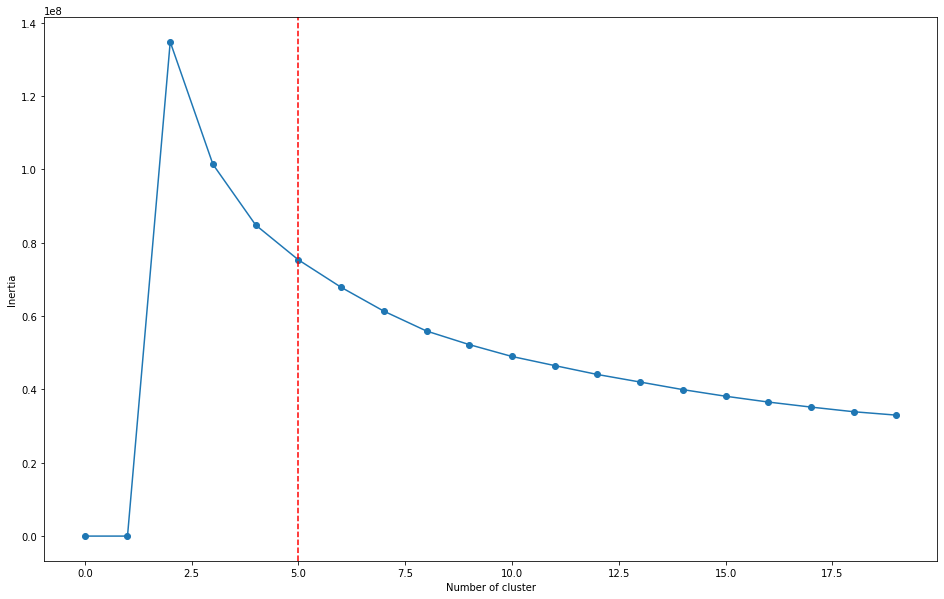

In [58]:
plt.plot(range(0,20),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=5,color='red',linestyle='--')
plt.ylabel('Inertia')

In [59]:
from sklearn.cluster import KMeans
#pc=pd.DataFrame(pca_samples)
kmeans=KMeans(n_clusters=5,n_init=30)
kmeans.fit(pc)
print("WCSS:",kmeans.inertia_)
print('Iterations until converged:', kmeans.n_iter_)
print('Final centroids:')
print(kmeans.cluster_centers_)
print('Cluster assigments')
print(kmeans.labels_)


#Coordinates of cluster centers witht shape [n_clusters, n_features] 
kmeans.cluster_centers_

#Labels of each point 
kmeans.labels_

# Get the indices of the points for each corresponding clusters 
mydict={i: np.where(kmeans.labels_ ==i)[0] for i in range(kmeans.n_clusters)}



dictlist=[]
for key, value in mydict.items():
    temp=[key,value]
    dictlist.append(temp)

ratingmatrix['Labels']=kmeans.labels_ #So that we have the clustering of each user ID 
ratingmatrix




WCSS: 75327251.9396966
Iterations until converged: 15
Final centroids:
[[-39.28090915  23.33857543   3.56473324]
 [ 28.28901693 -27.32300122 -12.04739868]
 [ 72.72024271  45.91373686  21.72935392]
 [-10.48494251 -19.15306516  16.40433983]
 [  2.20441717  19.86709693 -31.01099441]]
Cluster assigments
[4 0 4 ... 4 4 1]


anime_id,1,5,6,7,8,15,16,17,18,19,...,44044,44059,44070,44087,45598,45753,46491,47398,47616,Labels
user_id,,,,,,,,,,,,,,,,,,,,,
3,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
19,8.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353357,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
353365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
353381,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


C:\Users\Camila\AppData\Local\Temp\ipykernel_45536\1909674402.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


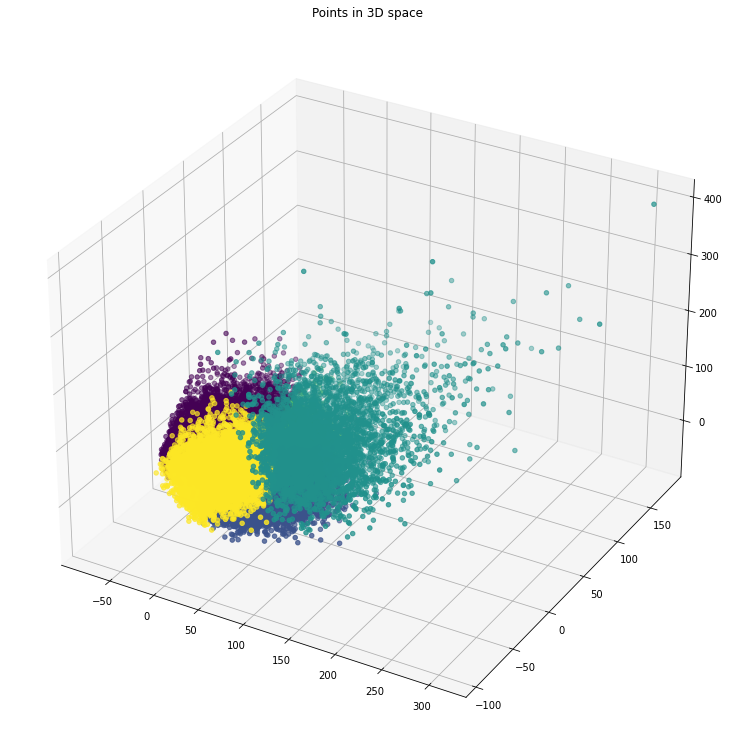

In [60]:
preds=kmeans.predict(pc)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(pc[0],pc[2],pc[1],c=preds)
plt.title('Points in 3D space')
plt.show()

ax.view_init(120, 30)

Above is a graph representing the 5 different clusters 

### 5. Recommendation System

Below is my final recommendation system. It consists of a blend of collaborative filtering and item based filtering (especially plot description based recommender)

In [62]:
def superior_recommendation(name):
    
    llist=[]
    ##First need to find the ID of the name of the anime in either df_synopsis
    i=df_synopsis.index[df_synopsis['Name']==name].tolist() #Find the index of df_synopsis for the name of the anime
    b=df_synopsis._get_value(i[0],'MAL_ID') #b is anime ID 
    


    def meancluster(number):#The number here is one of the unique values of the column Labels (k-means)
        count=0
        a=[]
        
        liste=[ratingmatrix.index[ratingmatrix['Labels']==number]][0]
        
        for y in liste:
            #the if statement for if the value is equal to 0 should probably be here 
            count=count+1
            
            c=ratingmatrix._get_value(y,b)# Except if this value is equal to 0 --> then it shouldn't be counted 
           
            a.append(int(c))
        
        t=sum(a)/count
        
        return(t) # Will return an average of the scores 

    labs=ratingmatrix.Labels.unique().tolist()

    
    for x in labs: 
        temps={x:meancluster(x)}
    y=max(temps,key=temps.get)
     #This will give the cluster that rated the anime the highest 

   
    
    ylist=ratingmatrix.index[ratingmatrix['Labels']==y].tolist()
    rightanimes=[]
    

    
    def avgg(columns): 
        count=0
        avgglist=[]
        for item in ylist: 
            count=count+1
            ytem=ratingmatrix._get_value(item,cols)
            avgglist.append(ytem) 
        totall=sum(avgglist)/count
        return(totall) #This will give the average users of cluster y have given for an anime (columns is anime id)
    
    for cols in ratingmatrix.columns:
        avgg(cols) 
        if avgg(cols)>=meancluster(y):
            rightanimes.append(cols) # Find animes that have the same score or higher than the chosen anime at the beginning

    listidx=[]
    indexlist=df_synopsis.index.tolist()

    for idxx in rightanimes: 
        
        if df_synopsis.loc[df_synopsis['MAL_ID']==idxx].index[0]:
            listidx.append(df_synopsis.loc[df_synopsis['MAL_ID']==idxx].index[0])#will return indices of the animes which would allow to get other information from them

    df2_synopsis=df_synopsis.iloc[df_synopsis.index.isin(listidx)]
    
    cv=CountVectorizer()

    cv2_matrix=cv.fit_transform(df2_synopsis['bag of words'])
    coss_sim=cosine_similarity(cv2_matrix,cv2_matrix)

    indicis=pd.Series(df2_synopsis.index, index=df2_synopsis['Name']) 

    synops=[]
    names=[]
    rating=[]
    genr=[]
    idx=indicis[name]
    scores=list(enumerate(coss_sim[idx]))
    scores=sorted(scores, key=lambda x: x[1], reverse=True)
    scores=scores[1:5]
    similarity=[i[1] for i in scores]
    anime_indices=[i[0] for i in scores]
    for index in anime_indices: 
        synops.append(df_synopsis['sypnopsis'].iloc[index])
        names.append(df_synopsis['Name'].iloc[index])
        rating.append(df_synopsis['Score'].iloc[index])
        genr.append(df_synopsis['Genres'].iloc[index])

    df=pd.DataFrame({'Names':names,'Synopsis':synops,'Similarity':similarity,'Genres':genr,'Score':rating})
    return df.sort_values('Similarity', ascending=False)

    
        

superior_recommendation('Trigun')         
            

,Names,Synopsis,Similarity,Genres,Score
0,Azumanga Daioh,Chiyo Mihama begins her high school career as ...,0.747038,"Slice of Life, Comedy, School",7.98
1,Ranma ½: Chuugoku Nekonron Daikessen! Okite Ya...,ll is well at the Tendo residence when from ou...,0.735812,"Adventure, Comedy, Shounen",7.26
2,Witch Hunter Robin,ches are individuals with special powers like ...,0.735650,"Action, Mystery, Police, Supernatural, Drama, ...",7.27
3,Fruits Basket,fter the accident in which she lost her mother...,0.732627,"Slice of Life, Comedy, Supernatural, Drama, Ro...",7.69
